# Scenario: Anato's Valet Service at FAST NU

Anato has applied for a job at FAST National University. Since he has zero education, the university has no choice but to offer him a position as an elevator operator for the newly installed elevators at the newly established new building of the newly renovated FAST University, Lahore.



Now the new building has only 4 floors where the elevator is currently operational.

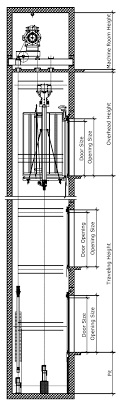
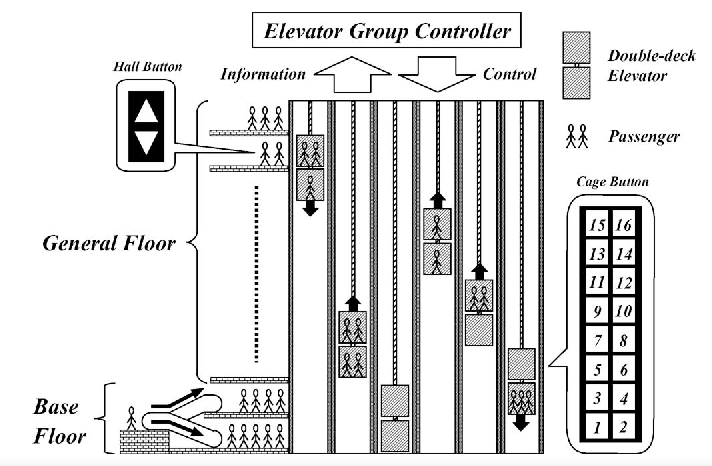

[ note: ignore the images and their details, they are just there to help your brain visualize the problem easily and also cause they look cool ]

You are tasked with designing an algorithm for a simple elevator system for a building with multiple floors. The goal is to help Anato to optimize:
1. **The elevator's movement to minimize the average waiting time for passengers**
   - *since everyone here is in a hurry to complete their assignments*

2. **The total energy consumption of the elevator system**
   - *since FAST is Gharib and a bit behind on their electricity bills*


The elevator system consists of one elevator that can move in between floors. Passengers can call the elevator from any floor and specify their desired destination floor. The Algorithm must help Anato intelligently decide which floor to visit next based on the current requests from passengers and its current position.

Tasks:

1. Implement a hill climbing algorithm to optimize the elevator's movement strategy.

2. Define a fitness function that evaluates the performance of the elevator system, considering factors such as average waiting time for passengers and total energy consumption.

3. Model the problem space, including the current state of the elevator (e.g., position, direction), pending passenger requests, and the layout of the building (number of floors).

4. Use the hill climbing algorithm to iteratively improve the elevator's movement strategy by exploring neighboring solutions, such as adjusting the order of floor visits or optimizing the direction of travel.

# Coding Starts here:

In [17]:
import random
import datetime

class ElevatorSystem:
    def __init__(self, num_floors):
        self.num_floors = num_floors
        self.current_floor = random.randint(1, num_floors)
        self.passenger_requests = {}  # {floor: (destination, time)}

    def add_passenger_request(self, floor, destination, time):
        self.passenger_requests[floor] = (destination, time)

    def remove_passenger_request(self, floor):
        del self.passenger_requests[floor]

    def move_elevator(self, destination):
        if destination > self.current_floor:
            print(f"Elevator moving up from floor {self.current_floor} to floor {destination}.")
            self.current_floor = destination
        elif destination < self.current_floor:
            print(f"Elevator moving down from floor {self.current_floor} to floor {destination}.")
            self.current_floor = destination
        else:
            print(f"Elevator has arrived at floor {self.current_floor}.")

In [16]:
def format_time(dt):
    return dt.strftime("%H:%M:%S")

In [10]:
def fitness_function(elevator):
    # Calculate the fitness based on factors such as total waiting time and energy consumption
    total_waiting_time = sum(abs(floor - elevator.current_floor) * (datetime.datetime.now() - time).total_seconds() for floor, (_, time) in elevator.passenger_requests.items())
    # Assuming energy consumption is directly proportional to the total distance traveled by the elevator
    total_distance_traveled = sum(abs(floor - elevator.current_floor) for floor, _ in elevator.passenger_requests.items())
    energy_consumption = total_distance_traveled  # Simplified assumption for illustration

    return -total_waiting_time - energy_consumption  # Minimize waiting time and energy consumption

In [11]:
def hill_climbing(elevator, iterations=100):
    current_fitness = fitness_function(elevator)

    for i in range(iterations):
        neighboring_elevator = ElevatorSystem(elevator.num_floors)
        neighboring_elevator.current_floor = elevator.current_floor
        neighboring_elevator.passenger_requests = dict(elevator.passenger_requests)

        # Generate a neighboring solution (randomly choose a request to change)
        random_floor = random.choice(list(neighboring_elevator.passenger_requests.keys()))
        neighboring_elevator.remove_passenger_request(random_floor)
        new_floor = random.randint(1, neighboring_elevator.num_floors)
        new_time = datetime.datetime.now()  # Generating the current time for the new request
        neighboring_elevator.add_passenger_request(new_floor, random_floor, new_time)

        new_fitness = fitness_function(neighboring_elevator)

        if new_fitness > current_fitness:
            elevator.current_floor = neighboring_elevator.current_floor
            elevator.passenger_requests = dict(neighboring_elevator.passenger_requests)
            current_fitness = new_fitness
            print(f"Iteration {i+1}: Improved fitness to {current_fitness}")
            print(f"Current Elevator State: Floor - {elevator.current_floor}, Requests - {elevator.passenger_requests}")

    print("Hill climbing finished.")

In [12]:
# Example usage
if __name__ == "__main__":
    num_floors = 4  # Number of floors
    elevator = ElevatorSystem(num_floors)

    # Add initial passenger requests using a loop
    initial_requests = [
        (1, 4),
        (3, 2),
        (2, 1),
        (4, 3),
        (2, 4),
        (1, 3)
      ]  # List of (start_floor, destination_floor) tuples

    for start_floor, destination_floor in initial_requests:
        R_Time = datetime.datetime.now()
        elevator.add_passenger_request(start_floor, destination_floor, R_Time)
        print(f"Added Request Current Floor {start_floor}: Destination - {destination_floor}, Time - {format_time(R_Time)}")

Added Request Current Floor 1: Destination - 4, Time - 09:26:56
Added Request Current Floor 3: Destination - 2, Time - 09:26:56
Added Request Current Floor 2: Destination - 1, Time - 09:26:56
Added Request Current Floor 4: Destination - 3, Time - 09:26:56
Added Request Current Floor 2: Destination - 4, Time - 09:26:56
Added Request Current Floor 1: Destination - 3, Time - 09:26:56


In [13]:
    print("Initial Elevator State:")
    print(f"Current Floor: {elevator.current_floor}")
    print("Passenger Requests:")
    for floor, (destination, time) in elevator.passenger_requests.items():
        print(f"  Floor {floor}: Destination - {destination}, Time - {format_time(time)}")

Initial Elevator State:
Current Floor: 4
Passenger Requests:
  Floor 1: Destination - 3, Time - 09:26:56
  Floor 3: Destination - 2, Time - 09:26:56
  Floor 2: Destination - 4, Time - 09:26:56
  Floor 4: Destination - 3, Time - 09:26:56


Short Question:
Why is the Added Request Number different form the requests that were stored?

Answer:

In [14]:
    # Run hill climbing algorithm
    hill_climbing(elevator)

Iteration 1: Improved fitness to -5.136834
Current Elevator State: Floor - 4, Requests - {1: (3, datetime.datetime(2024, 3, 17, 9, 26, 56, 898148)), 2: (4, datetime.datetime(2024, 3, 17, 9, 26, 56, 897668)), 4: (3, datetime.datetime(2024, 3, 17, 9, 26, 56, 925318))}
Iteration 2: Improved fitness to -5.081921
Current Elevator State: Floor - 4, Requests - {1: (3, datetime.datetime(2024, 3, 17, 9, 26, 56, 898148)), 4: (3, datetime.datetime(2024, 3, 17, 9, 26, 56, 925318)), 2: (2, datetime.datetime(2024, 3, 17, 9, 26, 56, 925444))}
Iteration 3: Improved fitness to -4.082108
Current Elevator State: Floor - 4, Requests - {1: (3, datetime.datetime(2024, 3, 17, 9, 26, 56, 898148)), 4: (3, datetime.datetime(2024, 3, 17, 9, 26, 56, 925318)), 3: (2, datetime.datetime(2024, 3, 17, 9, 26, 56, 925511))}
Iteration 5: Improved fitness to -3.000098
Current Elevator State: Floor - 4, Requests - {4: (3, datetime.datetime(2024, 3, 17, 9, 26, 56, 925318)), 3: (2, datetime.datetime(2024, 3, 17, 9, 26, 56, 9

In [15]:
    print("Final Elevator State after Hill Climbing:")
    print(f"Current Floor: {elevator.current_floor}")
    print("Passenger Requests:")
    for floor, (destination, time) in elevator.passenger_requests.items():
        print(f"  Floor {floor}: Destination - {destination}, Time - {format_time(time)}")


Final Elevator State after Hill Climbing:
Current Floor: 4
Passenger Requests:
  Floor 4: Destination - 3, Time - 09:26:56
